**Name:** Trini Kui

**StudentID:** 21204004

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

from sklearn.impute import MissingIndicator # Step 1
from sklearn.impute import SimpleImputer # Step 1
from sklearn.preprocessing import PolynomialFeatures # Step 2
from sklearn.preprocessing import OrdinalEncoder # Step 3
#from sklearn.preprocessing import OneHotEncoder # Step 3
from sklearn.preprocessing import KBinsDiscretizer # Step 4
from sklearn.preprocessing import Binarizer # Step 4
from sklearn.preprocessing import FunctionTransformer # Step 5
from sklearn.preprocessing import StandardScaler # Step 6
from sklearn.preprocessing import MinMaxScaler # Step 6
from sklearn.preprocessing import MaxAbsScaler # Step 6
from sklearn.preprocessing import RobustScaler # Step 6
from numpy import percentile

# Task 2

Ensure that you have:
- encoded all categorical attributes as numerical,
- filled in all missing values
- applied a scaler to rescale features
- treated outliers appropriately
- created at least one new feature from the existing ones

Shortly describe and Justify the data preparation choices you have taken in markdown cells. Aim at not having markdown cells longer than 2-3 lines of text.

In the end, save the prepared dataset as a CSV file on your hard disk.

# A. Importing Data

In [2]:
df = pd.read_csv("./bank_original.csv") #saved the original bank.csv data set to another file
df_original = pd.read_csv("./bank_original.csv") #making copy of original dataframe
column_names = df.columns
df.tail()

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

In [3]:
df.dtypes

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

## A.2 Attribute Types

***Numerical***
- `age`
- `balance`
- `day`
- `duration`
- `campaign`
- `pdays`
- `previous`

***Categorical***
- `job` - nominal
- `marital` - nominal
- `education` - ordinal
- `default` - nominal
- `housing` - nominal
- `loan` - nominal
- `contact` - nominal
- `month` - ordinal
- `poutcome` - nominal
- `subscribed` - nominal

In [4]:
def encoding_check(df_one,df_two,col_name1,col_name2,show=False):
    if show is True:
        display(df_two.head())
    print('pre-encoding', df_one.groupby(col_name1).size())
    print()
    print('post-encoding', df_two.groupby(col_name2).size())

# B. Process and Encode the Categorical Features

**NOTE: Normally, we should train_test_split (sklearn) the data before encoding and scaling because we don't want to influence the training of the ML model with the test data aka data leakage, but since this etivity is all about data preparation, I will use the full data set.**

## B.1 Encode Ordinal Categorical Attributes 

### Education

In [5]:
edu_level = ['missing','primary','secondary','tertiary'] #0 = missing, 1 = primary, 2 = secondary, 3 = tertiary
df['education'] = df['education'].replace(np.NaN,'missing') #replace blanks with 'missing' value, temporary value for now
encoder = OrdinalEncoder(categories=[edu_level])
df['education'] = encoder.fit_transform(df.loc[:,['education']])
encoding_check(df_original,df,'education','education',True)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single        3.0      no      392     yes   no   
1  39.0   technician  divorced        2.0      no      688     yes  yes   
2  59.0      retired   married        2.0      no     1035     yes  yes   
3  47.0  blue-collar   married        2.0      no      398     yes  yes   
4  54.0      retired   married        2.0      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

pre-encoding education
primary      217
secondary    995
tertiary     684
dtype: int64

post-encoding education
0.0    104
1.0    217
2.0    995
3.0    684
dtype: int64


### Month

Replacing the month name by its corresponding to make it easier to manipulate later on if we need to create more features

In [6]:
month_dict = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
              'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12} #for month

df['month'] = df['month'].replace(month_dict)
encoding_check(df_original,df,'month','month', True)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single        3.0      no      392     yes   no   
1  39.0   technician  divorced        2.0      no      688     yes  yes   
2  59.0      retired   married        2.0      no     1035     yes  yes   
3  47.0  blue-collar   married        2.0      no      398     yes  yes   
4  54.0      retired   married        2.0      no     1004     yes   no   

    contact  day  month  duration  campaign  pdays  previous poutcome  \
0  cellular    1      4       957         2    131         2  failure   
1  cellular    1      4       233         2    133         1  failure   
2  cellular    1      4       126         2    239         1  failure   
3  cellular    1      4       274         1    238         2  failure   
4  cellular    1      4       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

pre-encoding month
apr    205
aug    136
dec     41
feb    404
jan    245
jul    167
jun    104
mar     70
may    333
nov     68
oct     93
sep    134
dtype: int64

post-encoding month
1     245
2     404
3      70
4     205
5     333
6     104
7     167
8     136
9     134
10     93
11     68
12     41
dtype: int64


## B.2 Encode Nominal Categorical Attributes

### Default/Housing/Loan/Subscribed/Marital/Poutcome

`default`/`housing`/`loan`/`subscribed` - these 4 columns have a yes/no value so I will use one-hot encoding for these. Luckily, none of them have any NaN values (see section C) so it's a simple encoding exercise. 

`marital` - marital only has married/single/divorced values so we can do a simple one-hot encoding also.

`poutcome` - will leave it as is since missing data is quite telling and there should have be a 3rd category to signify a new client (that weren't previously contacted so their poutcome would have been blank)

I will do this after I complete the data input for `contact`.

### Contact

For `contact` with NaN values, we should fill these in before we one-hot code fill in the missing data. 
- will replace with cellular since most clients use cellular (see bar graph below)

<AxesSubplot:>

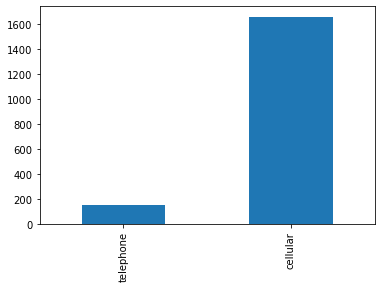

In [7]:
df['contact'].value_counts(ascending=True).plot(kind='bar')

In [8]:
print('Before', df.groupby('contact').size())
df['contact'] = df['contact'].fillna(value='cellular') #replace all NaN with cellular

print() 
print('After', df.groupby('contact').size()) #checks before and after counts

Before contact
cellular     1663
telephone     146
dtype: int64

After contact
cellular     1854
telephone     146
dtype: int64


### Job (See Section C)

### Fill missing data - Age (See Section C also)

Due to the way I'm filling in missing ages (supposed to be in the next Section C), I will have to do it before I one-hot encode `marital`.

`age` - using the average age of other clients with similar `marital`, `education` and `job` value as more accurate rough guide on how old someone is (instead of just using a general average)

In [9]:
fill_age = ['education','marital','job']
df['age'] = df['age'].fillna(df.groupby(fill_age)['age'].transform('mean').round())
    #Replaces NaN based on the rounded mean age of all clients with the same education, marital, job

df['age'].isna().any() #checks if anymore NaN in 'age' - False = no more NaN

False

### Final One-hot Code

In [10]:
df = pd.get_dummies(df, columns=['poutcome'], dummy_na=True, drop_first=True)
df = pd.get_dummies(df, columns=['default', 'housing', 'loan','marital','contact','subscribed'], drop_first=True)

#checking on two of the attributes to make sure one-hot worked
encoding_check(df_original,df,'default','default_yes')
encoding_check(df_original,df,'subscribed','subscribed_yes',True)

pre-encoding default
no     1985
yes      15
dtype: int64

post-encoding default_yes
0    1985
1      15
dtype: int64


age          job  education  balance  day  month  duration  campaign  \
0  32.0   technician        3.0      392    1      4       957         2   
1  39.0   technician        2.0      688    1      4       233         2   
2  59.0      retired        2.0     1035    1      4       126         2   
3  47.0  blue-collar        2.0      398    1      4       274         1   
4  54.0      retired        2.0     1004    1      4       479         1   

   pdays  previous  poutcome_other  poutcome_success  poutcome_nan  \
0    131         2               0                 0             0   
1    133         1               0                 0             0   
2    239         1               0                 0             0   
3    238         2               0                 0             0   
4    307         1               0                 0             0   

   default_yes  housing_yes  loan_yes  marital_married  marital_single  \
0            0            1         0                0               1   
1            0            1         1                0               0   
2            0            1         1                1               0   
3            0            1         1                1               0   
4            0            1         0                1               0   

   contact_telephone  subscribed_yes  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0

pre-encoding subscribed
no     1000
yes    1000
dtype: int64

post-encoding subscribed_yes
0    1000
1    1000
dtype: int64


**Note:** There was an issue with get_dummies dropping a label within each the attributes if there's more than 2 possible values. 

Ex. `martial` has 'divorced', 'single' or 'married' but it only shows `marital_married` and `marital_single`. 'divorced' is missing, but we can still get this value by see if each client has both 0 value for `marital_married` and `marital_single` columns. 

In [11]:
#check for missing labels issue 
marital_divorced = np.where((df['marital_married']==0) & (df['marital_single'] == 0))
print(len(df.loc[marital_divorced])) # # of divorced after one-hot
print()
print(df_original.groupby('marital').size())# # of divorced in original data set

215

marital
divorced     215
married     1111
single       674
dtype: int64


# C. Finding and Replacing Missing Data

There's a lot of skewing in this dataset so I want to try and avoid a simple mean/median/mode value replace. Maybe a more complex version (aka mean/median/mode based on some other attribute) would make more sense and I'll look at it on an attribute by attribute basis. 

But first, we will find which columns even have missing data and how many entries.

In [12]:
print(df_original.isna().sum())

print()
print('\033[1m Percentage of missing data \033[0m')
for i in column_names:
    print(i,": {}%".format(round(df_original[i].isna().sum()/len(column_names),5)))

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

 Percentage of missing data 
age : 0.70588%
job : 0.58824%
marital : 0.0%
education : 6.11765%
default : 0.0%
balance : 0.0%
housing : 0.0%
loan : 0.0%
contact : 11.23529%
day : 0.0%
month : 0.0%
duration : 0.0%
campaign : 0.0%
pdays : 0.0%
previous : 0.0%
poutcome : 26.70588%
subscribed : 0.0%


`poutcome` has 26.7% of missing data, but I will keep this column since no data in itself is quite telling (aka that it's probably a new client). New clients also provide a lot of useful data in predicting the `subscribed` value, so I don't want to lose these entries. 

The other attributes are only missing a small portion - so I won't drop any columns.

### Age

See section B.2. Had to fill in age before I encoded the `marital` attribute. 

### Education

- `education` - NaN values were replaced with 0
    - will replace 0 values using the median value for each age (not mean since there are quite a number of outliers)
        - using median since most clients have secondary education, so if I round the mean, it'll probably be 2 for all of them.
    - If no median data, will replace with 2 (assume client has finished secondary level since all clients are over 18) - see bar graph
    - grouping by age, since younger people tend to have a higher level of education (see box plot education/age box plot below)

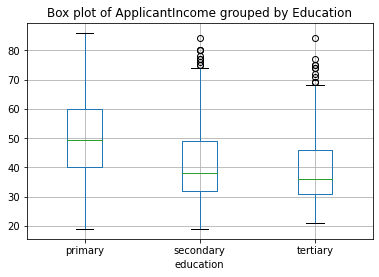

In [13]:
df_original.boxplot(column='age', by='education')
plt.title('Box plot of ApplicantIncome grouped by Education')
plt.suptitle("")
plt.show()

<AxesSubplot:>

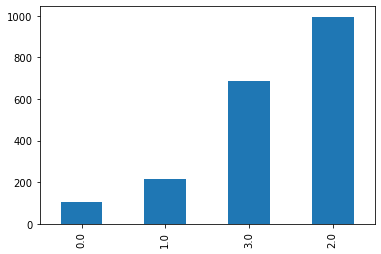

In [14]:
df['education'].value_counts(ascending=True).plot(kind='bar')

In [15]:
df_education = df.loc[df['education'] != 0] #filtered out the dataframe for original entries that had education filled
fill_education = df_education.groupby(['age'])['education'].median().round().to_frame()
df.loc[df['education'] == 0, 'education'] = df.age.map(fill_education['education']) #vlookup fill_education values into df
df['education'].fillna(value=2, inplace=True)

In [16]:
print('check that the mapping worked')
display(fill_education.loc[[46]])
display(df_original.loc[[257]]) #original dataset
display(df.loc[[257]]) #ok, fill_education '2' education filled correctly into df
print()
display(fill_education.loc[[38]])
display(df_original.loc[[10]])
display(df.loc[[10]]) #ok, fill_education '2' education filled correctly into df
display(df_original.loc[[15]])
display(df.loc[[15]])
print()

print()
print('check stats after replacing NaN data')
print('After', df.groupby('education').size())

check that the mapping worked


education
age           
46         2.0

age  job  marital education default  balance housing loan   contact  \
257  46.0  NaN  married       NaN      no      677      no   no  cellular   

     day month  duration  campaign  pdays  previous poutcome subscribed  
257    3   feb       425         1     82         1  failure         no

age  job  education  balance  day  month  duration  campaign  pdays  \
257  46.0  NaN        2.0      677    3      2       425         1     82   

     previous  poutcome_other  poutcome_success  poutcome_nan  default_yes  \
257         1               0                 0             0            0   

     housing_yes  loan_yes  marital_married  marital_single  \
257            0         0                1               0   

     contact_telephone  subscribed_yes  
257                  0               0

education
age           
38         2.0

age         job marital education default  balance housing loan  \
10  38.0  management  single       NaN      no      715     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
10  cellular    2   apr       951         1    132         3  failure   

   subscribed  
10         no

age         job  education  balance  day  month  duration  campaign  \
10  38.0  management        2.0      715    2      4       951         1   

    pdays  previous  poutcome_other  poutcome_success  poutcome_nan  \
10    132         3               0                 0             0   

    default_yes  housing_yes  loan_yes  marital_married  marital_single  \
10            0            1         0                0               1   

    contact_telephone  subscribed_yes  
10                  0               0

age          job  marital education default  balance housing loan  \
15  38.0  blue-collar  married       NaN      no        0     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
15  cellular    2   apr       477         2    267         1  failure   

   subscribed  
15         no

age          job  education  balance  day  month  duration  campaign  \
15  38.0  blue-collar        2.0        0    2      4       477         2   

    pdays  previous  poutcome_other  poutcome_success  poutcome_nan  \
15    267         1               0                 0             0   

    default_yes  housing_yes  loan_yes  marital_married  marital_single  \
15            0            1         0                1               0   

    contact_telephone  subscribed_yes  
15                  0               0



check stats after replacing NaN data
After education
1.0     219
2.0    1093
3.0     688
dtype: int64


In [17]:
df.loc[df['education'] == 0] #check no more 0 'NaN' education

Empty DataFrame
Columns: [age, job, education, balance, day, month, duration, campaign, pdays, previous, poutcome_other, poutcome_success, poutcome_nan, default_yes, housing_yes, loan_yes, marital_married, marital_single, contact_telephone, subscribed_yes]
Index: []

### Contact

See section B. NaN were replaced with cellular

### Poutcome

See section B. NaNs were left as is.

### Job

`job` - I will just drop rows with no jobs since there's really little correlation between the variables (ex. within the same age, there is a wide range of jobs that someone can have) and there are only 10 rows without this data so not much information is lost if I drop it after input missing data for other attributes
- Don't want to introduce even more bias also, so I won't input some value

**Encode**
- Will use one-hot encoding after dropna is used since there are only 11 unique jobs
- Otherwise, using a dictionary and assigning each job a number will get confusing (ex. 1 = admin., 2 = management, etc.)

In [18]:
display(df[df['job'].isna()]) #rows with missing jobs
print('# of rows with no jobs: ',len(df[df['job'].isna()]))
print('# of unique jobs: ',len(df['job'].unique())-1) #-1 cause one of them is NaN

age  job  education  balance  day  month  duration  campaign  pdays  \
255   42.0  NaN        1.0     2398    3      2       144         2    271   
257   46.0  NaN        2.0      677    3      2       425         1     82   
831   41.0  NaN        1.0     2398    8      5       287         2     -1   
1223  55.0  NaN        2.0     2206   12      8       265         1     91   
1281  50.0  NaN        2.0      558    9      7       464         1    683   
1669  54.0  NaN        2.0     2206   13      5       260         1     91   
1711  77.0  NaN        2.0      397    7      5       300         3     -1   
1801  28.0  NaN        2.0      326   11     10       450         1    231   
1868  48.0  NaN        2.0     1819    2      9      1440         1    458   
1975  45.0  NaN        3.0      406    7      9       314         1     -1   

      previous  poutcome_other  poutcome_success  poutcome_nan  default_yes  \
255          2               0                 0             0            0   
257          1               0                 0             0            0   
831          0               0                 0             1            0   
1223         5               0                 1             0            0   
1281         6               0                 0             0            0   
1669         4               0                 1             0            0   
1711         0               0                 0             1            0   
1801         1               0                 1             0            0   
1868         1               0                 0             0            0   
1975         0               0                 0             1            0   

      housing_yes  loan_yes  marital_married  marital_single  \
255             1         0                0               1   
257             0         0                1               0   
831             1         0                0               1   
1223            0         0                1               0   
1281            0         0                1               0   
1669            0         0                1               0   
1711            0         0                1               0   
1801            0         0                0               1   
1868            0         0                0               1   
1975            0         0                1               0   

      contact_telephone  subscribed_yes  
255                   0               0  
257                   0               0  
831                   0               0  
1223                  0               1  
1281                  0               1  
1669                  0               1  
1711                  1               1  
1801                  0               1  
1868                  0               1  
1975                  0               1

# of rows with no jobs:  10
# of unique jobs:  11


In [19]:
print('# of entries before dropping: ',len(df.index))
df.dropna(axis=0,subset=['job'],inplace=True) #dropna
print()
df = pd.get_dummies(df, columns=['job'], drop_first=True) #one-hot encodering
print('# of entries after dropping: ',len(df.index))
df

# of entries before dropping:  2000

# of entries after dropping:  1990


age  education  balance  day  month  duration  campaign  pdays  \
0     32.0        3.0      392    1      4       957         2    131   
1     39.0        2.0      688    1      4       233         2    133   
2     59.0        2.0     1035    1      4       126         2    239   
3     47.0        2.0      398    1      4       274         1    238   
4     54.0        2.0     1004    1      4       479         1    307   
...    ...        ...      ...  ...    ...       ...       ...    ...   
1995  20.0        2.0     2785   16      9       327         2     -1   
1996  28.0        2.0      127   16      9      1334         2     -1   
1997  81.0        1.0     1154   17      9       231         1     -1   
1998  46.0        1.0     4343   20      9       185         1     -1   
1999  40.0        2.0     6403   22      9       208         2     -1   

      previous  poutcome_other  ...  job_blue-collar  job_entrepreneur  \
0            2               0  ...                0                 0   
1            1               0  ...                0                 0   
2            1               0  ...                0                 0   
3            2               0  ...                1                 0   
4            1               0  ...                0                 0   
...        ...             ...  ...              ...               ...   
1995         0               0  ...                0                 0   
1996         0               0  ...                0                 0   
1997         0               0  ...                0                 0   
1998         0               0  ...                0                 0   
1999         0               0  ...                0                 1   

      job_housemaid  job_management  job_retired  job_self-employed  \
0                 0               0            0                  0   
1                 0               0            0                  0   
2                 0               0            1                  0   
3                 0               0            0                  0   
4                 0               0            1                  0   
...             ...             ...          ...                ...   
1995              0               0            0                  0   
1996              0               0            0                  0   
1997              0               0            1                  0   
1998              0               0            0                  0   
1999              0               0            0                  0   

      job_services  job_student  job_technician  job_unemployed  
0                0            0               1               0  
1                0            0               1               0  
2                0            0               0               0  
3                0            0               0               0  
4                0            0               0               0  
...            ...          ...             ...             ...  
1995             0            1               0               0  
1996             0            0               0               0  
1997             0            0               0               0  
1998             1            0               0               0  
1999             0            0               0               0  

[1990 rows x 29 columns]

### Day

`days` isn't very useful for us, especially since there's no year, so we can't tell if each date is on what day (ie. mon, tues, wed, etc.) and we can't create a datetime column. I will drop this column since I won't be using this.

In [20]:
df.drop('day', axis=1, inplace=True)

### Check Missing Data Again

In [21]:
print(df.isna().sum())
#No more missing data, looks good now. 

age                  0
education            0
balance              0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
default_yes          0
housing_yes          0
loan_yes             0
marital_married      0
marital_single       0
contact_telephone    0
subscribed_yes       0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
dtype: int64


# D. Treatment of Outliers

Looking mostly at numerical attributes since the categorical ones were encodes to discrete categories (Boolean or within a few bins).

### Age

`age` - using standard deviation  method since it has a fairly gaussian-like distribution already. using 3 st dev since 99.7% of data would be within this rage (trying not to get rid of too many entries).

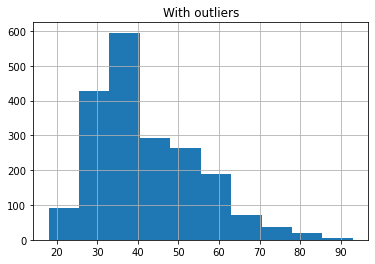

upper threshold:  79.82775514426108 lower threshold:  3.600385559256509
# of outliers:  18
# of entries before dropping:  1990
# of entries after dropping:  1972


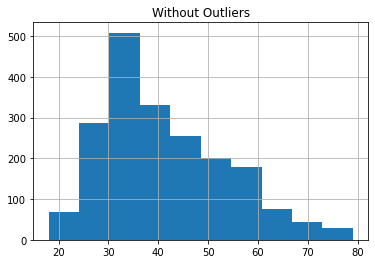

In [22]:
df['age'].hist() #before removing outliers
plt.title('With outliers')
plt.show()

cutoff_age_upper = df['age'].mean() + 3*df['age'].std() #contains most data
cutoff_age_lower = df['age'].mean() - 3*df['age'].std() 
    #contains most data, don't need to use since everyone is at least 18
print('upper threshold: ',cutoff_age_upper, 'lower threshold: ',cutoff_age_lower)
print('# of outliers: ',len(df.loc[df['age'] >= cutoff_age_upper]))

#drop off outliers
print('# of entries before dropping: ',len(df.index))
df = df.drop(df[df.age >= cutoff_age_upper].index)
print('# of entries after dropping: ',len(df.index))
df['age'].hist()
plt.title('Without Outliers')
plt.show()

### Campaign

A majority of the clients were only contact a few times, so I will try to make a better distribution shape by removing the outliers. Interquartile would be good for non-gaussian distributions but it didn't detect any outliers so I will just leave it and scale it later on.

<AxesSubplot:>

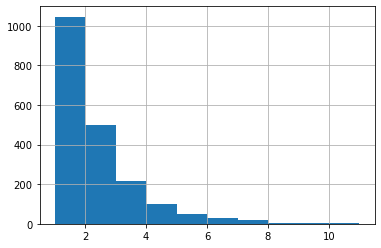

In [23]:
df['campaign'].hist()

In [24]:
# calculate interquartile range
q25, q75 = percentile(df['campaign'], 25), percentile(df['campaign'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR (box) =%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5 #common factor k = 1.5
lower, upper = q25 - cut_off, q75 + cut_off #calculate lower and upper value bounds

print('# of outliers: ',len(df.loc[(df['age'] >= upper) & (df['age'] <= lower)]))

Percentiles: 25th=1.000, 75th=2.000, IQR (box) =1.000
# of outliers:  0


### Balance & Previous

`balance`/`previous` - very skewed to the left, will perform log on them to try and make them more gaussian-like
- `balance` - will remove the one 81,204 outlier first
    - this was already dropped when `age` outliers were removed since the client with this balance is 84 y/o
- Use natural log for attributes that look exponential exponential (make sure all values are positive first by adding a constant)

In [25]:
df_original.loc[df_original['balance'] >= 80000]

age      job  marital  education default  balance housing loan  \
1033  84.0  retired  married  secondary      no    81204      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1033  telephone    1   apr       390         1     94         3  success   

     subscribed  
1033        yes

In [26]:
#Dropping the max `balance` 81,204 (DON'T NEED THIS ANYMORE)
#print('Max balance value: ',df['balance'].max())
#df.drop(df[df.balance > 80000].index, inplace=True)

#Calculating Log
print(df[['balance','previous']].min()) #applying some constant so the np.log will work
df['balance_log'] = np.log(df['balance']+981) #min 980 +1
df['previous_log'] = np.log(df['previous']+1) #min 0 +1

balance    -980
previous      0
dtype: int64


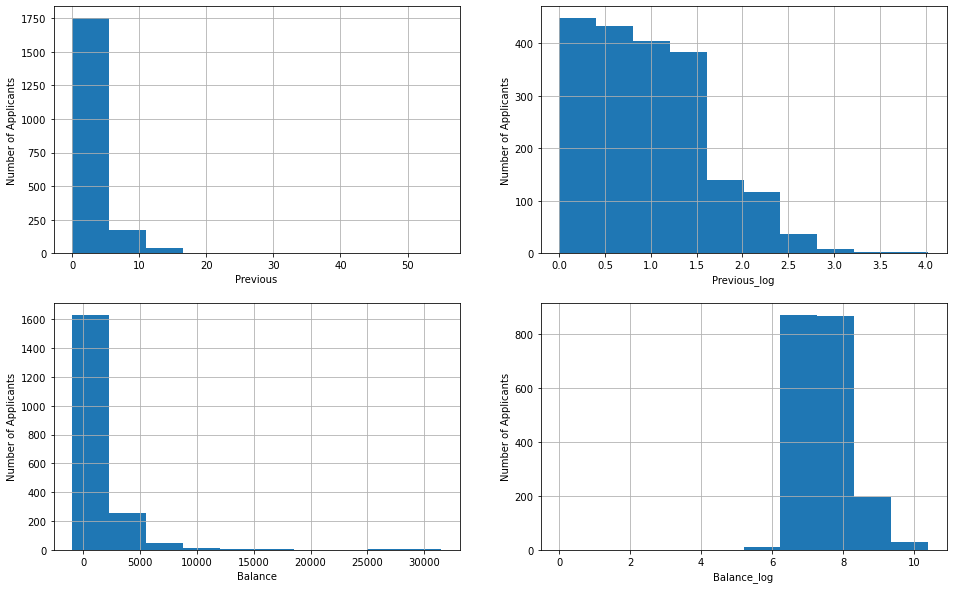

In [27]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_xlabel('Previous')
ax1.set_ylabel('Number of Applicants')
df['previous'].hist()

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_xlabel('Previous_log')
ax2.set_ylabel('Number of Applicants')
df['previous_log'].hist()

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_xlabel('Balance')
ax3.set_ylabel('Number of Applicants')
df['balance'].hist()

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_xlabel('Balance_log')
ax4.set_ylabel('Number of Applicants')
df['balance_log'].hist()
plt.show()

`balance` and `previous` Not perfect, but now they look a bit more gaussian-like instead of a really extreme exponential shape.

### Duration

Will not touch the outliers in duration since it's not actually used to predict anything, but I will still leave this column in since we're not at the ML stage yet
- Input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model

### Pdays

`pdays` - Using interquartile because of the long tail (non-gaussian), but it doesn't seem like there are any outliers so I will leave it and scale it later.

<AxesSubplot:>

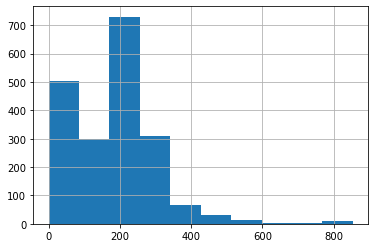

In [28]:
df['pdays'].hist()

In [29]:
# calculate interquartile range
q25, q75 = percentile(df['pdays'], 25), percentile(df['pdays'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR (box) =%.3f' % (q25, q75, iqr))
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off 

print('# of outliers: ',len(df.loc[(df['pdays'] >= upper) & (df['pdays'] <= lower)]))

Percentiles: 25th=77.000, 75th=251.000, IQR (box) =174.000
# of outliers:  0


# F. Creation of Derived Features

### New Feature - Age Groups

Normally banks have different types of campaigns for different age group since each age group has their own goals (ex. younger clients might be more worried about getting savings/starting their retirement funds)

These are arbitrary ages groups I made up (of course, the bank can create more age groups to make a more detailed analysis but I'll keep it simple here).

*Age Groups*
- Age 18 - 22 - youth
- Age 23 - 34 - young adult
- Age 35 - 54 - middle age
- Age 55 - 64 - older age
- Age 65+ - senior

Then I will use a dictionary to encode the age groups since it's an ordinal attribute.

In [30]:
#https://stackoverflow.com/questions/52753613/grouping-categorising-ages-column-in-python-pandas
age_labels = ['youth','young adult','middle age','older age','senior']
age_bins = [0,23,35,55,65,100]
age_dict = {'youth': 1, 'young adult': 2, 'middle age': 3, 'older age': 4, 'senior': 5}

df['age group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False).replace(age_dict)
display(df.head(5))
print(df.groupby('age group').size())

age  education  balance  month  duration  campaign  pdays  previous  \
0  32.0        3.0      392      4       957         2    131         2   
1  39.0        2.0      688      4       233         2    133         1   
2  59.0        2.0     1035      4       126         2    239         1   
3  47.0        2.0      398      4       274         1    238         2   
4  54.0        2.0     1004      4       479         1    307         1   

   poutcome_other  poutcome_success  ...  job_management  job_retired  \
0               0                 0  ...               0            0   
1               0                 0  ...               0            0   
2               0                 0  ...               0            1   
3               0                 0  ...               0            0   
4               0                 0  ...               0            1   

   job_self-employed  job_services  job_student  job_technician  \
0                  0             0            0               1   
1                  0             0            0               1   
2                  0             0            0               0   
3                  0             0            0               0   
4                  0             0            0               0   

   job_unemployed  balance_log  previous_log  age group  
0               0     7.224753      1.098612          2  
1               0     7.419980      0.693147          3  
2               0     7.608871      0.693147          4  
3               0     7.229114      1.098612          3  
4               0     7.593374      0.693147          3  

[5 rows x 31 columns]

age group
1     32
2    666
3    948
4    242
5     84
dtype: int64


#### Example use for new feature - Age Group

In the stacked bar graph, we can see that the age group 3 (age 35-54) are less likely to subscribe. Age group 2 and 4 (23-34 and 55-64) looks like they have ~ 50/50 chance of subscribing. Finally, the remaining groups 1 and 5 (18-22 and 65+) will most likely subscribe. Since I don't have any info on the campaign offerings itself, I can simply conclude that the current campaign is not very geared towards age 35-54 range customers. 

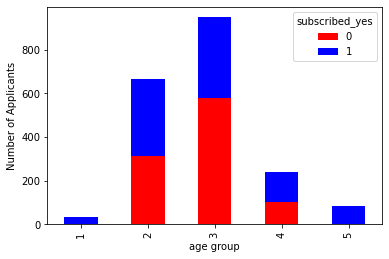

In [31]:
crosstab_CL = pd.crosstab(df['age group'], df['subscribed_yes'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

### New Feature - Seasonality

The banking industry also sees some seasonality trends [link](https://www.investopedia.com/ask/answers/052915/banking-sector-subject-any-seasonal-trends.asp#:~:text=The%20typical%20seasonal%20pattern%20of,till%20bottoming%20out%20in%20December.), so splitting the last contact month by season might be useful in finding which seasons are more successful than others. I'm using season months based in North America :)

- *Spring* - Mar, Apr, May
- *Summer* - Jun, Jul, Aug
- *Fall* - Sep, Oct, Nov
- *Winter* - Dec, Jan, Feb

Will use dictionaries to get the season from the `month` number, and then convert the season to a corresponding number.

In [32]:
month_season_dict = {1: 'winter', 2: 'winter', 3: 'spring', 4: 'spring', 5: 'spring', 6: 'summer',
              7: 'summer', 8: 'summer', 9: 'fall', 10: 'fall', 11: 'fall', 12: 'winter'}
season_dict = {'spring': 1,'summer': 2, 'fall':3, 'winter': 4}

df['contact season'] = df['month'].replace(month_season_dict).replace(season_dict)
display(df.tail(5))
print(df.groupby('contact season').size())

age  education  balance  month  duration  campaign  pdays  previous  \
1994  26.0        2.0      655      9       190         1     -1         0   
1995  20.0        2.0     2785      9       327         2     -1         0   
1996  28.0        2.0      127      9      1334         2     -1         0   
1998  46.0        1.0     4343      9       185         1     -1         0   
1999  40.0        2.0     6403      9       208         2     -1         0   

      poutcome_other  poutcome_success  ...  job_retired  job_self-employed  \
1994               0                 0  ...            0                  0   
1995               0                 0  ...            0                  0   
1996               0                 0  ...            0                  0   
1998               0                 0  ...            0                  0   
1999               0                 0  ...            0                  0   

      job_services  job_student  job_technician  job_unemployed  balance_log  \
1994             0            1               0               0     7.400010   
1995             0            1               0               0     8.233769   
1996             0            0               0               0     7.010312   
1998             1            0               0               0     8.579980   
1999             0            0               0               0     8.907071   

      previous_log  age group  contact season  
1994           0.0          2               3  
1995           0.0          1               3  
1996           0.0          2               3  
1998           0.0          3               3  
1999           0.0          3               3  

[5 rows x 32 columns]

contact season
1    598
2    398
3    288
4    688
dtype: int64


#### Example use for new feature - Seasonality

There are different ways to use seasonality (and even age group together). We can glean even more specific data that could be useful depending on how the campaign is marketed towards clients. 

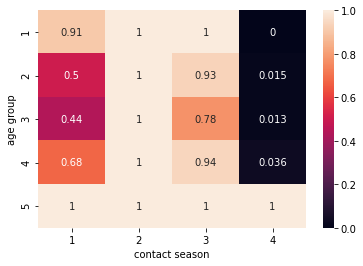

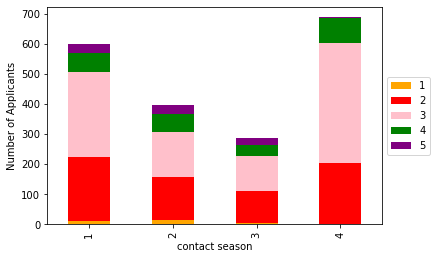

In [33]:
pivot_table_LCG = df.pivot_table(values='subscribed_yes', 
                           index='age group', 
                           columns='contact season',
                           aggfunc='mean')
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

crosstab_CL = pd.crosstab(df['contact season'], df['age group'])
crosstab_CL.plot(kind='bar', stacked=True, color=['orange', 'red','pink','green','purple'])
plt.ylabel('Number of Applicants')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

1. *Heat Map* - Seniors and spring are the best people/time to contact. Youths and fall are the next best.

2. *Stacked Bar* - Most clients were contacted in winter and then spring. This could be why the spring and winter subscribed results weren't that good in the heat map (ie. more contacted clients, means more rejections in the first place) or there could be other factors like not having any excess money to put into a term loan in the winter/spring months. 

etc. etc.

### New Feature - Previous contact bins

This new feature partially deals with the outlier issue with `pdays` by putting them in 6 bins. Depending on the range of each bin, this can even get us a better distribution shape. This new feature would be useful in seeing how frequent clients should be contacted (among other attributes) to improve success rates.

1. -1 not contacted
2. 0-90 very recent (3 months)
3. 91-180 recent (6 months)
4. 181-270  not recent (9 months)
5. 271 - 365 old (1 year)
6. 366+ very old (1 year+)

In [34]:
pdays_labels = ['not contacted','very recent','recent','not recent','old','very old']
pdays_bins = [-2,0,91,181,271,366,1000]
pcontacted_dict = {'not contacted': 1,'very recent': 2, 'recent':3, 'not recent': 4, 'old': 5, 'very old': 6}

df['pcontacted'] = pd.cut(df['pdays'], bins=pdays_bins, labels=pdays_labels, right=False).replace(pcontacted_dict)
display(df.head(5))
print(df.groupby('pcontacted').size())

age  education  balance  month  duration  campaign  pdays  previous  \
0  32.0        3.0      392      4       957         2    131         2   
1  39.0        2.0      688      4       233         2    133         1   
2  59.0        2.0     1035      4       126         2    239         1   
3  47.0        2.0      398      4       274         1    238         2   
4  54.0        2.0     1004      4       479         1    307         1   

   poutcome_other  poutcome_success  ...  job_self-employed  job_services  \
0               0                 0  ...                  0             0   
1               0                 0  ...                  0             0   
2               0                 0  ...                  0             0   
3               0                 0  ...                  0             0   
4               0                 0  ...                  0             0   

   job_student  job_technician  job_unemployed  balance_log  previous_log  \
0            0               1               0     7.224753      1.098612   
1            0               1               0     7.419980      0.693147   
2            0               0               0     7.608871      0.693147   
3            0               0               0     7.229114      1.098612   
4            0               0               0     7.593374      0.693147   

   age group  contact season  pcontacted  
0          2               1           3  
1          3               1           3  
2          4               1           4  
3          3               1           4  
4          3               1           5  

[5 rows x 33 columns]

pcontacted
1    448
2    104
3    309
4    833
5    173
6    105
dtype: int64


#### Example use for new feature - Previous contact bins

Example - Can probably try to gauge how frequently each age group needs to be contacted to get a subscribed = yes. The youngest and oldest age groups are a bit abnormal (maybe outliers?) but for age groups 2-4 (age 23-64), more recent contacts generally mean higher success rate. 

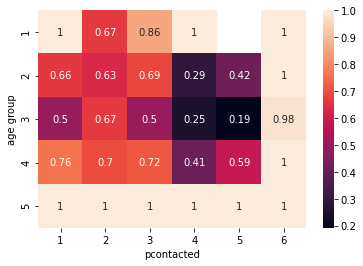

In [35]:
pivot_table_LCG = df.pivot_table(values='subscribed_yes', 
                           index='age group', 
                           columns='pcontacted',
                           aggfunc='mean')
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

### New Feature - Cos & Sin Month

Without accounting for the cyclical properties of month, it will look like 12 (Dec) is far from 1 (Jan), even 1 and 12 should technically be next to each other because it loops through 1-12. To fix this, we use sine and cosine. 

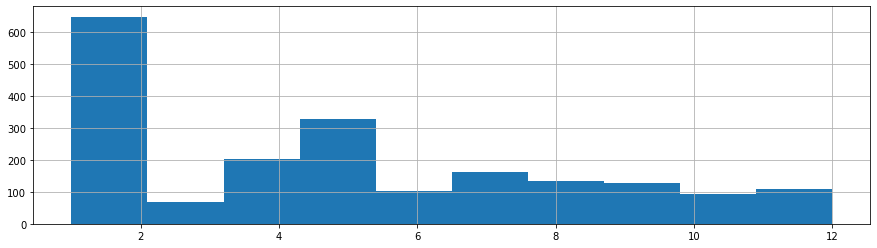

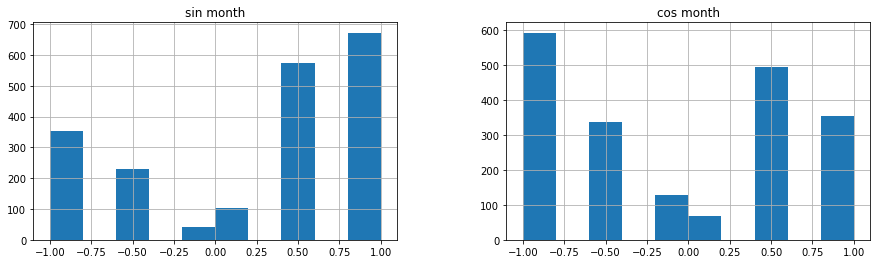

In [36]:
#https://medium.com/@dan.allison/how-to-encode-the-cyclic-properties-of-time-with-python-6f4971d245c0
#https://towardsdatascience.com/how-to-handle-cyclical-data-in-machine-learning-3e0336f7f97c
df['sin month'] = np.sin(2*np.pi*df['month']/df['month'].nunique())
df['cos month'] = np.cos(2*np.pi*df['month']/df['month'].nunique())

df['month'].hist(figsize=(15,4))
plt.show()

df[['sin month','cos month']].hist(figsize=(15,4))
plt.show()

# E. Scaling

- Will not be scaling `duration` either since we won't be using it to make any predictions.
- Will not be scaling binary attributes (ie. 1 and 0)

## Attributes

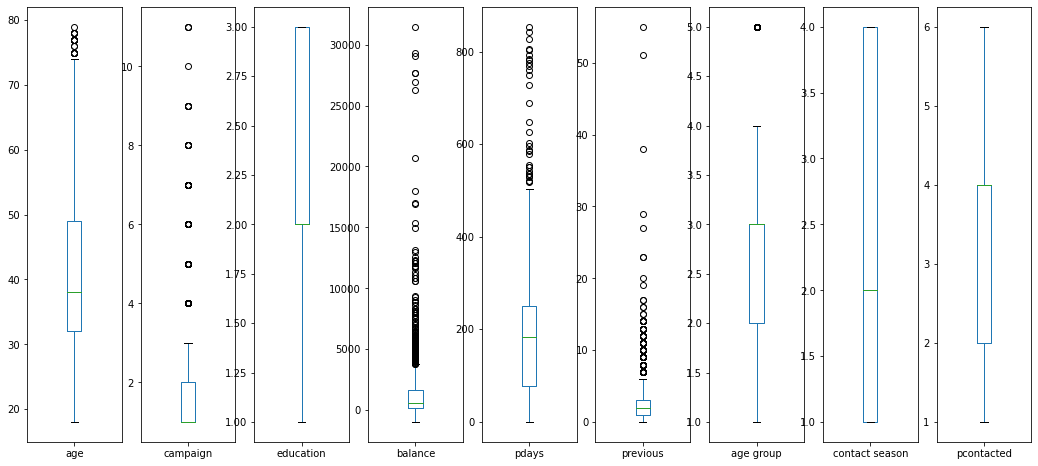

In [37]:
df[['age','campaign','education','balance','pdays','previous','age group','contact season','pcontacted']].plot(kind='box', subplots =True, sharex=False, sharey=False, figsize=(18,8))
plt.show()

### Age

Will scale using minmax scaler since there's a fairly gaussian shape. After scaling, the distribution looks a lot smoother, compared to the pairwise plot in section E.

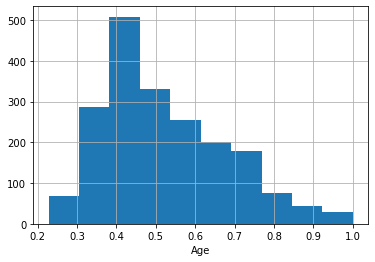

In [38]:
df['age'] = df['age']/df['age'].max()
df['age'].hist()
plt.xlabel('Age')
plt.show()

### Campaign/Education

Can't really scale these too much since they have discrete values, but we can bring it down to the [0,1] range for standarization.

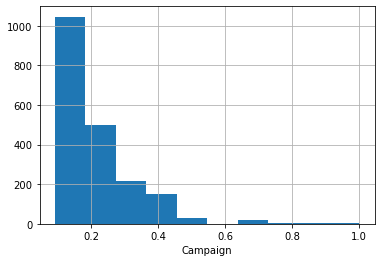

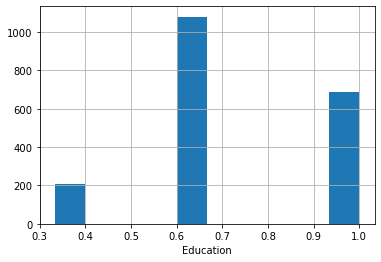

In [39]:
df['campaign'] = df['campaign']/df['campaign'].max()
df['campaign'].hist()
plt.xlabel('Campaign')
plt.show()

df['education'] = df['education']/df['education'].max()
df['education'].hist()
plt.xlabel('Education')
plt.show()

### pdays, balance, previous

Using Robust Scaler because it's useful when there's a lot of outliers, by removing the median and scaling by the quantile range. 

Will scale `pdays` after I add in a new feature `pcontacted`.

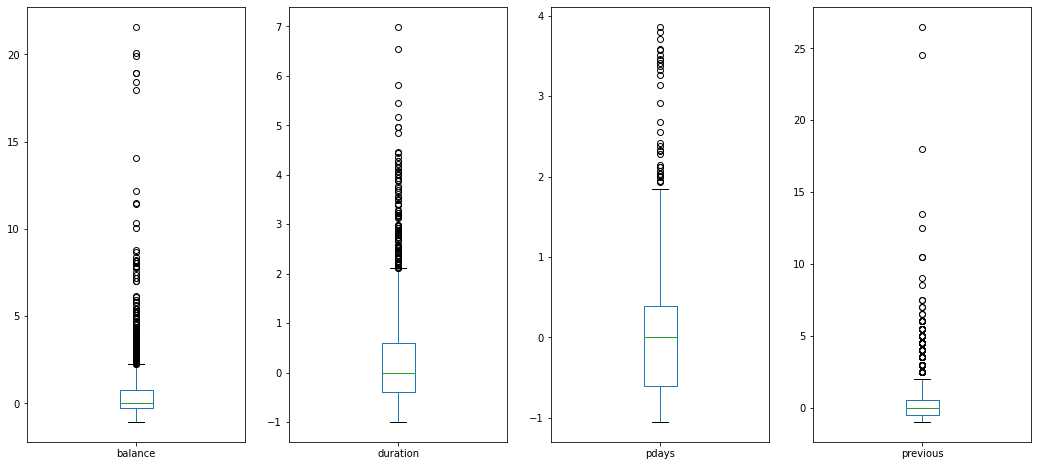

In [40]:
robust_scaler = RobustScaler()
df[['balance','duration','pdays','previous']] = robust_scaler.fit_transform(
    df[['balance','duration','pdays','previous']])

df[['balance','duration','pdays','previous']].plot(
    kind='box', subplots=True, sharex=False, sharey=False, figsize=(18, 8))
plt.show()

### Month

Already created new features `sin month` and `cos month` to deal with the cyclical nature of `month`.

### Scaling New Features

These are categorical attributes, but since I want to scale them for standardization, I'll use something similar to MinMax Scalar. For `contact season`, it's not quite cyclical data, since it's more seasonality (observations within one calendar year).

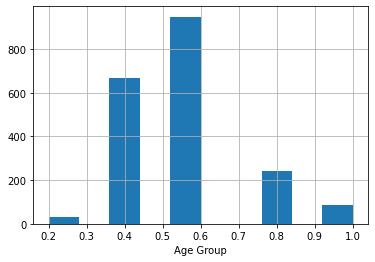

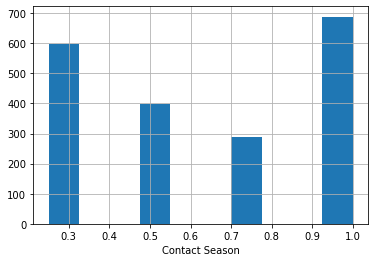

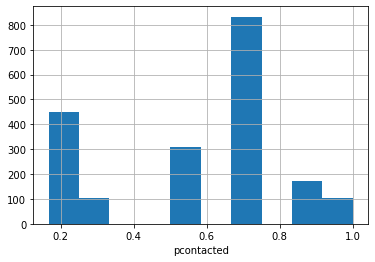

In [41]:
df['age group'] = df['age group']/df['age group'].max()
df['age group'].hist()
plt.xlabel('Age Group')
plt.show()

df['contact season'] = df['contact season']/df['contact season'].max()
df['contact season'].hist()
plt.xlabel('Contact Season')
plt.show()

df['pcontacted'] = df['pcontacted']/df['pcontacted'].max()
df['pcontacted'].hist()
plt.xlabel('pcontacted')
plt.show()

# Final Dataframe

In [42]:
df

age  education   balance  month  duration  campaign     pdays  \
0     0.405063   1.000000 -0.107797      4  3.181518  0.181818 -0.293103   
1     0.493671   0.666667  0.098727      4 -0.004400  0.181818 -0.281609   
2     0.746835   0.666667  0.340834      4 -0.475248  0.181818  0.327586   
3     0.594937   0.666667 -0.103611      4  0.176018  0.090909  0.321839   
4     0.683544   0.666667  0.319205      4  1.078108  0.090909  0.718391   
...        ...        ...       ...    ...       ...       ...       ...   
1994  0.329114   0.666667  0.075702      9 -0.193619  0.090909 -1.051724   
1995  0.253165   0.666667  1.561835      9  0.409241  0.181818 -1.051724   
1996  0.354430   0.666667 -0.292691      9  4.840484  0.181818 -1.051724   
1998  0.582278   0.333333  2.648875      9 -0.215622  0.090909 -1.051724   
1999  0.506329   0.666667  4.086168      9 -0.114411  0.181818 -1.051724   

      previous  poutcome_other  poutcome_success  ...  job_student  \
0          0.0               0                 0  ...            0   
1         -0.5               0                 0  ...            0   
2         -0.5               0                 0  ...            0   
3          0.0               0                 0  ...            0   
4         -0.5               0                 0  ...            0   
...        ...             ...               ...  ...          ...   
1994      -1.0               0                 0  ...            1   
1995      -1.0               0                 0  ...            1   
1996      -1.0               0                 0  ...            0   
1998      -1.0               0                 0  ...            0   
1999      -1.0               0                 0  ...            0   

      job_technician  job_unemployed  balance_log  previous_log  age group  \
0                  1               0     7.224753      1.098612        0.4   
1                  1               0     7.419980      0.693147        0.6   
2                  0               0     7.608871      0.693147        0.8   
3                  0               0     7.229114      1.098612        0.6   
4                  0               0     7.593374      0.693147        0.6   
...              ...             ...          ...           ...        ...   
1994               0               0     7.400010      0.000000        0.4   
1995               0               0     8.233769      0.000000        0.2   
1996               0               0     7.010312      0.000000        0.4   
1998               0               0     8.579980      0.000000        0.6   
1999               0               0     8.907071      0.000000        0.6   

      contact season  pcontacted  sin month     cos month  
0               0.25    0.500000   0.866025 -5.000000e-01  
1               0.25    0.500000   0.866025 -5.000000e-01  
2               0.25    0.666667   0.866025 -5.000000e-01  
3               0.25    0.666667   0.866025 -5.000000e-01  
4               0.25    0.833333   0.866025 -5.000000e-01  
...              ...         ...        ...           ...  
1994            0.75    0.166667  -1.000000 -1.836970e-16  
1995            0.75    0.166667  -1.000000 -1.836970e-16  
1996            0.75    0.166667  -1.000000 -1.836970e-16  
1998            0.75    0.166667  -1.000000 -1.836970e-16  
1999            0.75    0.166667  -1.000000 -1.836970e-16  

[1972 rows x 35 columns]

# G. Save the Prepared Data Set

In [44]:
df.to_csv('bank.csv')